# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Richard Valentino Nainggolan
- **Email:** mr.richardhutabalian@gmail.com
- **ID Dicoding:** M002B4KY3813

## Menentukan Pertanyaan Bisnis

- What are the patterns or trends in bike rentals across different times (daily and hourly)?
- How do external factors like weather conditions and temperature affect bike rental demand?

## Import Semua Packages/Library yang Digunakan

In [574]:
# Importing all libraries to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [575]:
# Load dataset
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")

# display dataset information - day.csv
print(day_df.info())
print(day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [576]:
# see few rows of day.csv
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [577]:
#do the same with hour.csv to see the information in details
print(hour_df.info())
print(hour_df.describe())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

#### Merging day and hour DataFrames
To analyze the data in greater detail, we can combine the daily data (day) and the hourly data (hour) using the merge function in Pandas. This allows us to connect daily-level insights with hourly-level details.

In [578]:
# Merge datasets on 'dteday'
merged_df = hour_df.merge(
    day_df[['dteday', 'weathersit', 'atemp', 'cnt']],
    on='dteday',
    suffixes=('_hourly', '_daily')
)

# Cek dataset hasil penggabungan
print(merged_df.head())

# Checking the shape of the resulting DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit_hourly  temp  atemp_hourly   hum  windspeed  casual  registered  \
0                  1  0.24        0.2879  0.81        0.0       3          13   
1                  1  0.22        0.2727  0.80        0.0       8          32   
2                  1  0.22        0.2727  0.80        0.0       5          27   
3                  1  0.24        0.2879  0.75        0.0       3          10   
4                  1  0.24        0.2879  0.75        0.0       0           1   

   cnt_hourly  weathersit_daily  atemp_daily

In [579]:
# Checking for any null values in the 'dteday' column
missing_data = merged_df.loc[merged_df["dteday"].isnull()]
print("Missing rows based on 'dteday':", missing_data)

# Previewing the first 5 rows of the merged DataFrame
merged_df.head()

Missing rows based on 'dteday': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit_hourly, temp, atemp_hourly, hum, windspeed, casual, registered, cnt_hourly, weathersit_daily, atemp_daily, cnt_daily]
Index: []


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit_hourly,temp,atemp_hourly,hum,windspeed,casual,registered,cnt_hourly,weathersit_daily,atemp_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2,0.363625,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2,0.363625,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2,0.363625,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2,0.363625,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2,0.363625,985


as we can see clearly the output show 'Empty DataFrame' means there is no missing data or null values in the dteday column

**Insight:**
- We can see what feature in day.csv and hour.csv using dataframe
- By merging the daily and hourly datasets, we enable more granular analysis of the relationship between weather conditions and hourly bike rental patterns. This integration allows us to examine how factors like weather and temperature influence hourly rental trends, providing deeper insights for business strategies

### Assessing Data

#### Assessing data day_df

In [580]:
#first we will check data type using method info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


As we can see everything is fine, no difference of number of data in column. That means no missing value

In [581]:
#check for duplication - to confirm
print("number of duplicate: ", day_df.duplicated().sum())

number of duplicate:  0


In [582]:
# Check for unique values in the `weathersit` column
print("Unique values in 'weathersit' column:")
print(day_df["weathersit"].unique())

# Check the size (count) of each unique value
print("\nCount of each unique value in 'weathersit' column:")
print(day_df["weathersit"].value_counts())

Unique values in 'weathersit' column:
[2 1 3]

Count of each unique value in 'weathersit' column:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


In [583]:
#check descriptive statistic parameter of day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing data hour_df
now we will do the same to hour dataset, we will check for the missing value, duplicate, and lastly we will see the statistic parameter

In [584]:
#first we will check data type using method info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [585]:
#check for duplication - to confirm
print("number of duplicate: ", hour_df.duplicated().sum())

number of duplicate:  0


In [586]:
# Check for unique values in the `weathersit` column
print("Unique values in 'weathersit' column:")
print(hour_df["weathersit"].unique())

# Check the size (count) of each unique value
print("\nCount of each unique value in 'weathersit' column:")
print(hour_df["weathersit"].value_counts())

Unique values in 'weathersit' column:
[1 2 3 4]

Count of each unique value in 'weathersit' column:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


**as we can see, there are the difference between the data.csv and hour.csv. It's questionable tho as the number of 4th type of weathersit in hour.csv are consist only 3 data. Eventhough it's sensible for weather condition shifting in hour, but still in the next section for cleaning data we will impute these 3 data for analyze reason**

In [587]:
#check descriptive statistic parameter of hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Both day_df and hour_df datasets are complete, with no missing values or duplicates. This ensures the data quality required for reliable analysis. The statistical summary reveals key characteristics, such as the distribution of rentals and weather conditions, which will guide further exploration.

### Cleaning Data

#### for day dataset

In [588]:
# Rename 'cnt' to 'total_rentals' so people will know what it's tells about
day_df.rename(columns={"cnt": "total_rentals",
                      "hum": "humidity",
                      "atemp": "apparent_temperature",
                      "weathersit": "weather_condition",
                      "mnth": "month",
                      "dteday": "dateday",
                      "yr": "year"}, inplace=True)

In [589]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,apparent_temperature,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [590]:
# let say we don't analyze the data based time series, we can delete dteday, season, yr, and weekday. 
# as for now, we'll just delete column season, casual, registered, temp, instant as we don't analyze respected to them
day_df.drop(['season'], axis = 1, inplace= True)
day_df.drop(['casual'], axis = 1, inplace= True)
day_df.drop(['registered'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

# we analyze these three parameter using apparent_temperature as it is corellated with these three parameters
day_df.drop(['temp'], axis = 1, inplace= True)
day_df.drop(['humidity'], axis = 1, inplace= True)
day_df.drop(['windspeed'], axis = 1, inplace= True)

day_df.head()

,dateday,year,month,holiday,weekday,workingday,weather_condition,apparent_temperature,total_rentals
0,2011-01-01,0,1,0,6,0,2,0.363625,985
1,2011-01-02,0,1,0,0,0,2,0.353739,801
2,2011-01-03,0,1,0,1,1,1,0.189405,1349
3,2011-01-04,0,1,0,2,1,1,0.212122,1562
4,2011-01-05,0,1,0,3,1,1,0.229270,1600


In [591]:
# Converting numeric columns to categorical
# Converting the 'weekday' column into day names
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].replace(weekday_mapping)

# Converting the 'month' column into month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Des'}
day_df['month'] = day_df['month'].replace(month_mapping)

# Change the year column to reflect the dataset's original timeline
day_df['year'] = day_df['year'] + 2011

# Converting the 'holiday' column into categories
holiday_mapping = {0: 'No Holiday', 1: 'Holiday'}
day_df['holiday'] = day_df['holiday'].replace(holiday_mapping)

# Converting the 'workingday' column into categories
workingday_mapping = {0: 'Non-Working Day', 1: 'Working Day'}
day_df['workingday'] = day_df['workingday'].replace(workingday_mapping)

# Converting the 'weather_condition' column into categories
weather_condition_mapping = {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weather_condition'] = day_df['weather_condition'].replace(weather_condition_mapping)

# Denormalizing the apparent_temperature, humidity, and windspeed columns back to their actual values
# Original dataset range:
# Temperature: [0, 41] (assume in degrees Celsius)
# Humidity: [0, 1] (normalized scale)
# Windspeed: [0, 67] (assume in km/h)

# Denormalizing apparent_temperature
day_df['apparent_temperature'] = day_df['apparent_temperature'] * 41  # Assuming a range of 0-41 degrees Celsius

# Display the modified dataset
print(day_df.head())


      dateday  year month     holiday    weekday       workingday  \
0  2011-01-01  2011   Jan  No Holiday   Saturday  Non-Working Day   
1  2011-01-02  2011   Jan  No Holiday     Sunday  Non-Working Day   
2  2011-01-03  2011   Jan  No Holiday     Monday      Working Day   
3  2011-01-04  2011   Jan  No Holiday    Tuesday      Working Day   
4  2011-01-05  2011   Jan  No Holiday  Wednesday      Working Day   

     weather_condition  apparent_temperature  total_rentals  
0         Misty/Cloudy             14.908625            985  
1         Misty/Cloudy             14.503299            801  
2  Clear/Partly Cloudy              7.765605           1349  
3  Clear/Partly Cloudy              8.697002           1562  
4  Clear/Partly Cloudy              9.400070           1600  


#### for hour dataset

**dataset already checked manually and it can be confirmed that weathersit == 4 is anomaly data. In excel, we can see that all three "4" sorrounding by "3", that make more sense if it's false typing. However, we can apply the logic in below code.**

In [592]:
# Replace `weathersit=4` based on neighbors when they are the same
outlier_indices = hour_df[hour_df["weathersit"] == 4].index

for idx in outlier_indices:
    if idx > 0 and idx < len(hour_df) - 1:
        prev_weather = hour_df.loc[idx - 1, "weathersit"]
        next_weather = hour_df.loc[idx + 1, "weathersit"]

        # If previous and next `weathersit` are the same
        if prev_weather == next_weather:
            hour_df.loc[idx, "weathersit"] = prev_weather

In [593]:
print(outlier_indices)
print(hour_df.loc[idx])

Index([585, 8854, 9123], dtype='int64')
instant             9124
dteday        2012-01-21
season                 1
yr                     1
mnth                   1
hr                     1
holiday                0
weekday                6
workingday             0
weathersit             3
temp                0.14
atemp             0.1364
hum                 0.86
windspeed          0.194
casual                 1
registered            22
cnt                   23
Name: 9123, dtype: object


In [594]:
# Rename 'cnt' to 'total_rentals' so people will know what it's tells about
hour_df.rename(columns={"cnt": "total_rentals",
                      "hum": "humidity",
                      "atemp": "apparent_temperature",
                      "weathersit": "weather_condition",
                      "mnth": "month",
                      "dteday": "dateday",
                      "yr": "year",
                      "hr": "time"}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,time,holiday,weekday,workingday,weather_condition,temp,apparent_temperature,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [595]:
# let say we don't analyze the data based time series, we can delete dteday, season, yr, and weekday. 
# as for now, we'll just delete column season, casual, registered, temp, instant as we don't analyze respected to them
hour_df.drop(['season'], axis = 1, inplace= True)
hour_df.drop(['casual'], axis = 1, inplace= True)
hour_df.drop(['registered'], axis = 1, inplace= True)
hour_df.drop(['instant'], axis = 1, inplace= True)

# we analyze these three parameter using apparent_temperature as it is corellated with these three parameters
hour_df.drop(['temp'], axis = 1, inplace= True)
hour_df.drop(['humidity'], axis = 1, inplace= True)
hour_df.drop(['windspeed'], axis = 1, inplace= True)

hour_df.head()

,dateday,year,month,time,holiday,weekday,workingday,weather_condition,apparent_temperature,total_rentals
0,2011-01-01,0,1,0,0,6,0,1,0.2879,16
1,2011-01-01,0,1,1,0,6,0,1,0.2727,40
2,2011-01-01,0,1,2,0,6,0,1,0.2727,32
3,2011-01-01,0,1,3,0,6,0,1,0.2879,13
4,2011-01-01,0,1,4,0,6,0,1,0.2879,1


In [596]:
# Converting numeric columns to categorical
# Converting the 'weekday' column into day names
hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)

# Change the year column to reflect the dataset's original timeline
hour_df['year'] = hour_df['year'] + 2011

# Converting the 'month' column into month names
hour_df['month'] = hour_df['month'].replace(month_mapping)

# Convert the `time` column to clock format (e.g., 0 -> 00:00, 1 -> 01:00)
hour_df['time'] = hour_df['time'].apply(lambda x: f"{x:02d}:00")

# Converting the 'holiday' column into categories
hour_df['holiday'] = hour_df['holiday'].replace(holiday_mapping)

# Converting the 'workingday' column into categories
hour_df['workingday'] = hour_df['workingday'].replace(workingday_mapping)

# Converting the 'weather_condition' column into categories
hour_df['weather_condition'] = hour_df['weather_condition'].replace(weather_condition_mapping)

# Denormalizing the apparent_temperature, humidity, and windspeed columns back to their actual values
# Original dataset range:
# Temperature: [0, 41] (assume in degrees Celsius)
# Humidity: [0, 1] (normalized scale)
# Windspeed: [0, 67] (assume in km/h)

# Denormalizing apparent_temperature
hour_df['apparent_temperature'] = hour_df['apparent_temperature'] * 41  # Assuming a range of 0-41 degrees Celsius

# Display the modified dataset
print(hour_df.head())

      dateday  year month   time     holiday   weekday       workingday  \
0  2011-01-01  2011   Jan  00:00  No Holiday  Saturday  Non-Working Day   
1  2011-01-01  2011   Jan  01:00  No Holiday  Saturday  Non-Working Day   
2  2011-01-01  2011   Jan  02:00  No Holiday  Saturday  Non-Working Day   
3  2011-01-01  2011   Jan  03:00  No Holiday  Saturday  Non-Working Day   
4  2011-01-01  2011   Jan  04:00  No Holiday  Saturday  Non-Working Day   

     weather_condition  apparent_temperature  total_rentals  
0  Clear/Partly Cloudy               11.8039             16  
1  Clear/Partly Cloudy               11.1807             40  
2  Clear/Partly Cloudy               11.1807             32  
3  Clear/Partly Cloudy               11.8039             13  
4  Clear/Partly Cloudy               11.8039              1  


**Insight:**
- After cleaning, the datasets are more streamlined and easier to interpret. Unnecessary columns, such as casual, registered, and instant, were removed to focus on relevant variables. Categories like weekday, weather_condition, and time were reformatted for clarity, and normalized values were denormalized for better interpretability. Three outlier datas that might be mistyping also imputed by input the nearest data around them

In [643]:
##### Saving Cleaned & Merged Dataset
merged_df.to_csv("main.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore for day dataset
###### Please, Kak, if my analysis is not quite good or relevant, kindly give me a low score instead of rejecting my project (T∩T). My sincere apologies if it still doesn't fulfill the requirements, but as the Bangkit deadline is December 27, I truly hope you can still assess it. I am very thankful for your hard work in evaluating our tasks. Keep up the great work, Kak! 

_here we will merge our dataset into a merged_df once again for convenience reason and to finalize our dataset into single main.csv_

In [597]:
# Merge datasets on 'dateday'
merged_df = hour_df.merge(
    day_df[['dateday', 'weather_condition', 'apparent_temperature', 'total_rentals']],
    on='dateday',
    suffixes=('_hourly', '_daily')
)

# Check merged dataset
print(merged_df.head())

# Checking the shape of the resulting DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)

      dateday  year month   time     holiday   weekday       workingday  \
0  2011-01-01  2011   Jan  00:00  No Holiday  Saturday  Non-Working Day   
1  2011-01-01  2011   Jan  01:00  No Holiday  Saturday  Non-Working Day   
2  2011-01-01  2011   Jan  02:00  No Holiday  Saturday  Non-Working Day   
3  2011-01-01  2011   Jan  03:00  No Holiday  Saturday  Non-Working Day   
4  2011-01-01  2011   Jan  04:00  No Holiday  Saturday  Non-Working Day   

  weather_condition_hourly  apparent_temperature_hourly  total_rentals_hourly  \
0      Clear/Partly Cloudy                      11.8039                    16   
1      Clear/Partly Cloudy                      11.1807                    40   
2      Clear/Partly Cloudy                      11.1807                    32   
3      Clear/Partly Cloudy                      11.8039                    13   
4      Clear/Partly Cloudy                      11.8039                     1   

  weather_condition_daily  apparent_temperature_daily  total_r

In [604]:
# Group bike rentals by weekday using merged_df
merged_df.groupby(by='weekday').agg({
    'total_rentals_daily': ['max', 'min', 'mean', 'sum']
})

total_rentals_daily                             
                          max   min         mean       sum
weekday                                                   
Friday                   8362  1167  4700.838359  11690985
Monday                   7525    22  4391.920936  10887572
Saturday                 8714   627  4561.544188  11458599
Sunday                   8227   605  4239.505995  10607244
Thursday                 7804   431  4703.503440  11622357
Tuesday                  7767   683  4566.708113  11202135
Wednesday                8173   441  4574.609293  11322158

In [599]:
# Group bike rentals by time (hourly analysis)
merged_df.groupby(by='time').agg({
    'total_rentals_hourly': ['max', 'min', 'mean', 'sum']
})

total_rentals_hourly                        
                       max min        mean     sum
time                                              
00:00                  283   2   53.898072   39130
01:00                  168   1   33.375691   24164
02:00                  132   1   22.869930   16352
03:00                   79   1   11.727403    8174
04:00                   28   1    6.352941    4428
05:00                   66   1   19.889819   14261
06:00                  213   1   76.044138   55132
07:00                  596   1  212.064649  154171
08:00                  839   5  359.011004  261001
09:00                  426  14  219.309491  159438
10:00                  539   8  173.668501  126257
11:00                  663  10  208.143054  151320
12:00                  776   3  253.315934  184414
13:00                  760  11  253.661180  184919
14:00                  750  12  240.949246  175652
15:00                  750   7  251.233196  183149
16:00                  783  11  311.983562  227748
17:00                  976  15  461.452055  336860
18:00                  977  23  425.510989  309772
19:00                  743  11  311.523352  226789
20:00                  567  11  226.030220  164550
21:00                  584   6  172.314560  125445
22:00                  502   9  131.335165   95612
23:00                  256   2   87.831044   63941

In [600]:
# Define time categories (morning, afternoon, evening, night)
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract hour from `time` column and categorize
merged_df['time_category'] = merged_df['time'].str[:2].astype(int).apply(categorize_time)

# Combine weekday and time category for granular grouping
merged_df['weekday_time_category'] = merged_df['weekday'] + ' ' + merged_df['time_category']

# Group by granular weekday and time category
merged_df.groupby(by='weekday_time_category').agg({
    'total_rentals_hourly': ['max', 'min', 'mean', 'sum']
})

total_rentals_hourly                        
                                       max min        mean     sum
weekday_time_category                                             
Friday Afternoon                       634  15  258.386538  134361
Friday Evening                         957  39  357.199519  148595
Friday Morning                         785   4  205.053571  149279
Friday Night                           339   1   67.503038   55555
Monday Afternoon                       566  25  218.528846  113635
Monday Evening                         968  18  392.598558  163321
Monday Morning                         784   1  184.201923  134099
Monday Night                           457   1   54.537423   44448
Saturday Afternoon                     783  22  378.131429  198519
Saturday Evening                       731  15  261.988010  109249
Saturday Morning                       663   1  138.762619  101713
Saturday Night                         338   1   81.632019   68326
Sunday Afternoon                       776   7  364.171429  191190
Sunday Evening                         723  11  246.226190  103415
Sunday Morning                         591   1  125.797521   91329
Sunday Night                           345   1   69.907341   58093
Thursday Afternoon                     499  12  211.403101  109084
Thursday Evening                       976  28  414.201923  172308
Thursday Morning                       834   2  208.418863  150270
Thursday Night                         398   1   65.688264   53733
Tuesday Afternoon                      651   3  201.583815  104622
Tuesday Evening                        970  32  417.240385  173572
Tuesday Morning                        835   2  202.309958  144247
Tuesday Night                          378   1   57.972671   46668
Wednesday Afternoon                    566  10  200.905769  104471
Wednesday Evening                      977  26  405.595642  167511
Wednesday Morning                      839   1  206.927198  150643
Wednesday Night                        584   1   61.944717   50423

In [601]:
# Like we saw in merged_df.head() earlier, it's pretty clear the daily data gets repeated 23 times to match the hourly data.
# It's not that the dataset is bad or anything; we purposely made it this way for analysis.
# If we want to analyze, we can just filter for a specific hour (like hour == 0), so it's kinda the same as using only day_df.
filtered_df = merged_df[merged_df['time'] == '16:00']

print(merged_df['weather_condition_daily'].unique())

# Group data by `weather_condition_daily` for analysis
filtered_df.groupby('weather_condition_daily').agg({
    'total_rentals_daily': ['mean', 'max', 'min']
})

['Misty/Cloudy' 'Clear/Partly Cloudy' 'Light Rain/Snow']


total_rentals_daily           
                                       mean   max  min
weather_condition_daily                               
Clear/Partly Cloudy             4876.786177  8714  431
Light Rain/Snow                 1892.350000  4639  441
Misty/Cloudy                    4035.862348  8362  605

In [602]:
# Define temperature categories
# Cold: temperature < 10, Moderate: 10 <= temperature <= 25, Hot: temperature > 25
def categorize_temperature(temp):
    if temp < 10:
        return 'Cold'
    elif 10 <= temp <= 25:
        return 'Moderate'
    else:
        return 'Hot'

# Apply temperature categories to the dataset
merged_df['temperature_category'] = merged_df['apparent_temperature_hourly'].apply(categorize_temperature)

# Group data by weather condition and temperature category
merged_df.groupby(['weather_condition_hourly', 'temperature_category']).agg({
        'total_rentals_hourly': ['mean', 'sum']
    })

total_rentals_hourly         
                                                              mean      sum
weather_condition_hourly temperature_category                              
Clear/Partly Cloudy      Cold                            81.115385   103341
                         Hot                            307.384511  1135171
                         Moderate                       170.595873  1099661
Light Rain/Snow          Cold                            42.677419     7938
                         Hot                            278.106870    36432
                         Moderate                       103.333937   114184
Misty/Cloudy             Cold                            76.331301    37555
                         Hot                            276.362168   239606
                         Moderate                       162.885714   518791

**Insight:**
- Rentals peak on Friday and Thursday, likely due to commuting and social activities, while Monday shows the least activity, likely reflecting a slower start to the week.
- Peak rental times are at 8:00 AM (morning commute) and 5:00 PM (evening commute), indicating the strong influence of work-related travel.
- Friday Evening shows the highest activity, likely driven by leisure rentals at the end of the workweek. Saturday Afternoon is the most active weekend time, suggesting leisure-related usage.
- Clear/Partly Cloudy conditions see the highest rentals, followed by Misty/Cloudy, while Light Rain/Snow results in significantly lower rentals due to unfavorable biking conditions.
- In Clear/Partly Cloudy conditions, hot temperatures have the highest rental activity, showing a preference for warm weather. Cold temperatures generally lead to reduced activity across all weather types.
- Rentals are highest under hot and clear/partly cloudy conditions, reaffirming that warm and favorable weather significantly boosts usage. Moderate temperatures still show substantial activity, particularly under clear or misty/cloudy conditions. Cold temperatures consistently see the lowest rental counts, especially under Light Rain/Snow conditions.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What are the trends in bike rentals across different times (daily and hourly), and how can the business optimize availability to meet demand?

#### A. Visualization 1: Bar Chart of Average Total Rentals by Weekday
This bar chart represents average rentals by weekday:

Thursday and Friday show the highest average rentals.
Monday has the lowest average rentals, possibly reflecting the start of the workweek.

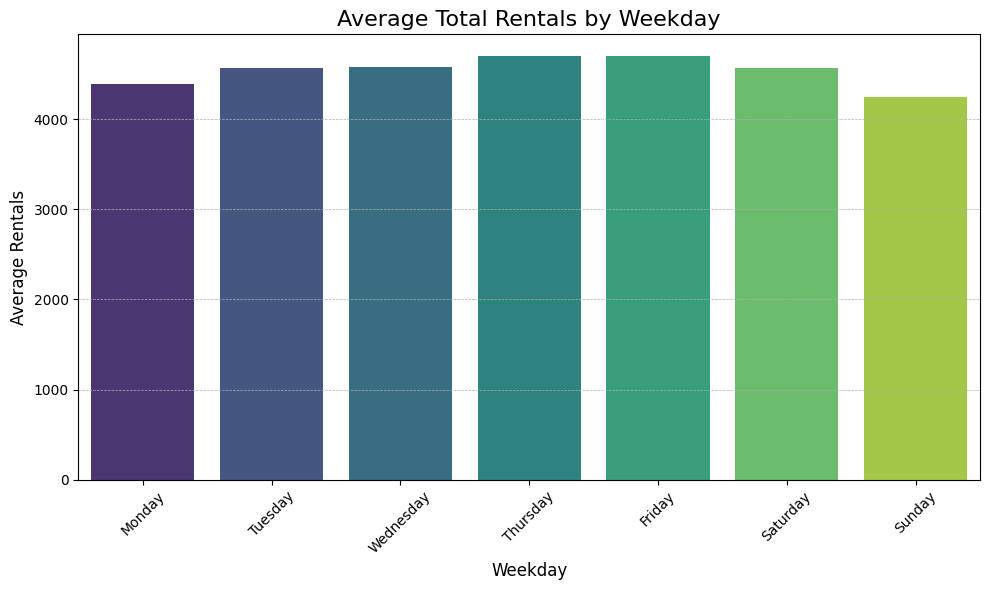

In [606]:
# Group data by weekday and calculate statistics
weekday_grouped = merged_df.groupby('weekday').agg({
    'total_rentals_daily': ['mean']
}).reset_index()

# Rename columns for clarity
weekday_grouped.columns = ['weekday', 'average_rentals']

# Sort weekdays in order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_grouped['weekday'] = pd.Categorical(weekday_grouped['weekday'], categories=weekday_order, ordered=True)
weekday_grouped = weekday_grouped.sort_values('weekday')

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_grouped, x='weekday', y='average_rentals', palette='viridis', hue='weekday', dodge=False)
plt.title('Average Total Rentals by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend([], [], frameon=False)  # Hide legend since hue is used only for palette
plt.tight_layout()
plt.show()


#### B. Visualization 2: Line Chart of Hourly Bike Rentals Analysis
The line chart illustrates hourly rental trends throughout the day:

Morning hours (7:00 - 9:00) and evening hours (17:00 - 18:00) show the most significant spikes in rentals, corresponding to commuting times.
Late-night hours (00:00 - 4:00) have the lowest rental activity.

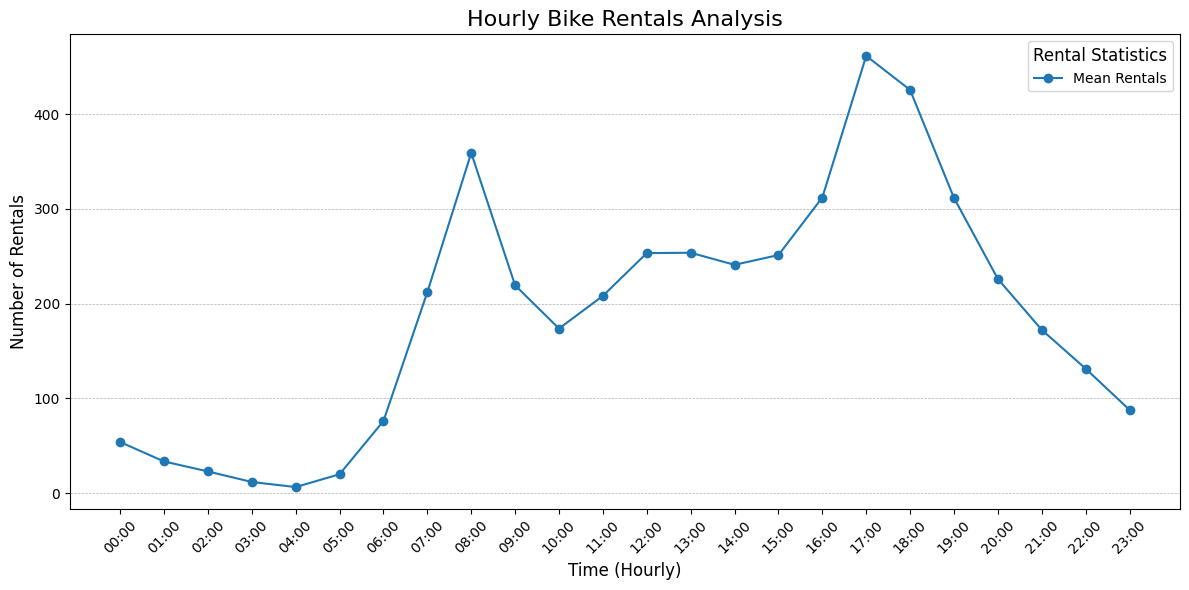

In [610]:
# Group bike rentals by time and calculate statistics
hourly_grouped = merged_df.groupby('time').agg({
    'total_rentals_hourly': ['mean']
}).reset_index()

# Rename columns for clarity
hourly_grouped.columns = ['time', 'mean_rentals']

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_grouped['time'], hourly_grouped['mean_rentals'], label='Mean Rentals', marker='o')

# Customize the plot
plt.title('Hourly Bike Rentals Analysis', fontsize=16)
plt.xlabel('Time (Hourly)', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(title='Rental Statistics', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### C. Visualization 3: Clustered Bar Chart of Total Rentals by Weekday and Time Category
This chart compares total rentals across weekdays segmented into time categories (Morning, Afternoon, Evening, Night):

Evening times show the most stabile rentals, especially on workingday.
Nighttime rentals remain consistently low across all weekdays.
on weekend, afternoon times show very high demand on bike-rent.

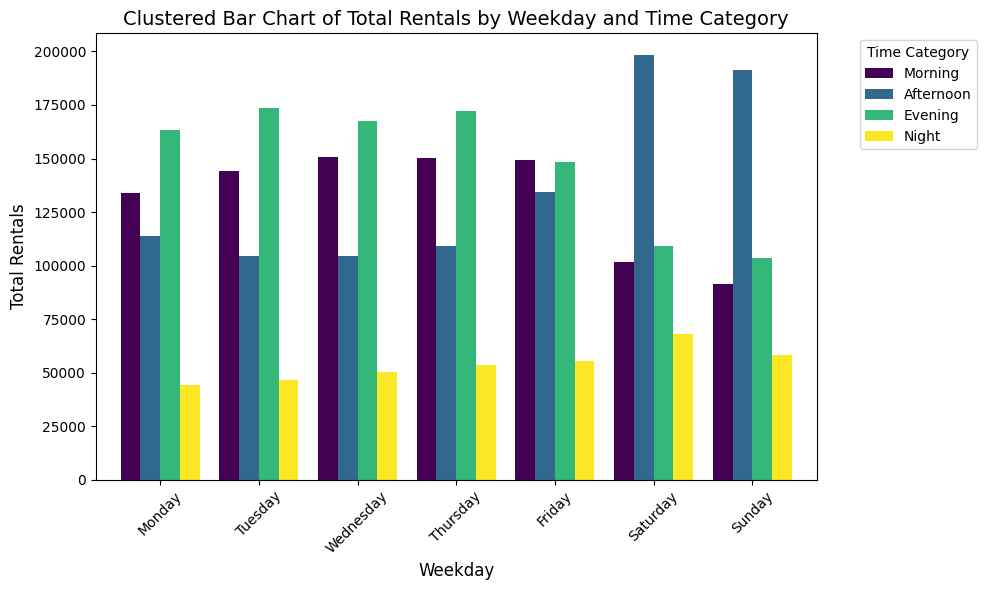

In [621]:
# Group data by weekday and time category with explicit observed=False
time_category_grouped = merged_df.groupby(['weekday', 'time_category'], observed=False)['total_rentals_hourly'].sum().unstack()

# Plot clustered bar chart
time_category_grouped.plot(kind='bar', figsize=(10, 6), cmap='viridis', width=0.8)

plt.title('Clustered Bar Chart of Total Rentals by Weekday and Time Category', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Time Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

### Pertanyaan 2: How do weather conditions and temperature impact bike rental demand, and what strategies can the business implement to mitigate their effects?

#### A. Visualization 1: Comparison of Rentals by Weather Condition (Bar and Pie Charts)
These charts visualize the average and percentage distribution of bike rentals at 16:00:

The bar chart indicates that Clear/Partly Cloudy has the highest average rentals, followed by Misty/Cloudy.
The pie chart provides a percentage breakdown, with Clear/Partly Cloudy dominating rentals at 45.1%.

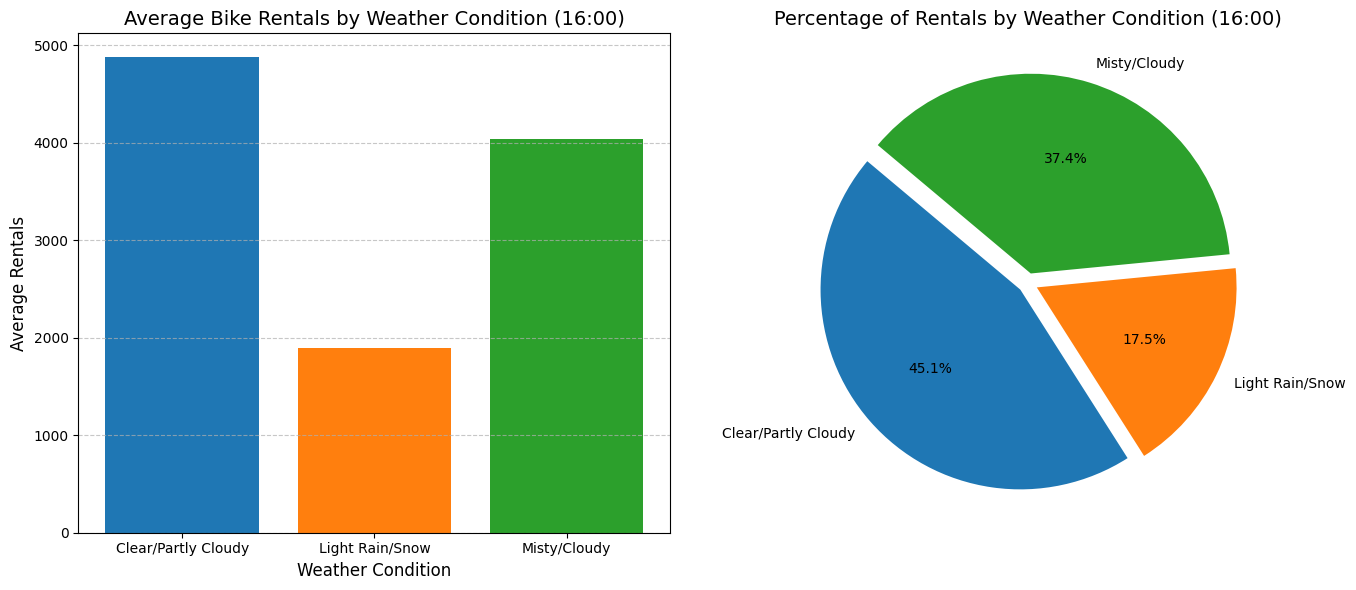

In [634]:
import matplotlib.pyplot as plt

# Filter data untuk jam tertentu (misalnya, 16:00)
filtered_df = merged_df[merged_df['time'] == '16:00']

# Hitung rata-rata penyewaan untuk setiap kategori cuaca
weather_stats = filtered_df.groupby('weather_condition_daily').agg({
    'total_rentals_daily': 'mean'
}).reset_index()

# Rename columns untuk mempermudah akses
weather_stats.columns = ['weather_condition', 'mean_rentals']

# Buat subplots: 1 bar chart dan 1 pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bar Chart
axes[0].bar(
    weather_stats['weather_condition'], 
    weather_stats['mean_rentals'], 
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
axes[0].set_title('Average Bike Rentals by Weather Condition (16:00)', fontsize=14)
axes[0].set_xlabel('Weather Condition', fontsize=12)
axes[0].set_ylabel('Average Rentals', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Pie Chart
axes[1].pie(
    weather_stats['mean_rentals'], 
    labels=weather_stats['weather_condition'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#1f77b4', '#ff7f0e', '#2ca02c'], 
    explode=(0.05, 0.05, 0.05)
)
axes[1].set_title('Percentage of Rentals by Weather Condition (16:00)', fontsize=14)

# Atur layout supaya tidak saling menutupi
plt.tight_layout()

# Tampilkan plot
plt.show()


#### C. Visualization 3: Stacked Bar Chart of Average Rentals by Weather Condition and Temperature
This stacked bar chart shows the average rentals segmented by temperature categories (Cold, Moderate, Hot) under different weather conditions:

Rentals are highest under Hot temperatures for all weather types.
Cold conditions contribute the least to total rentals, regardless of weather.


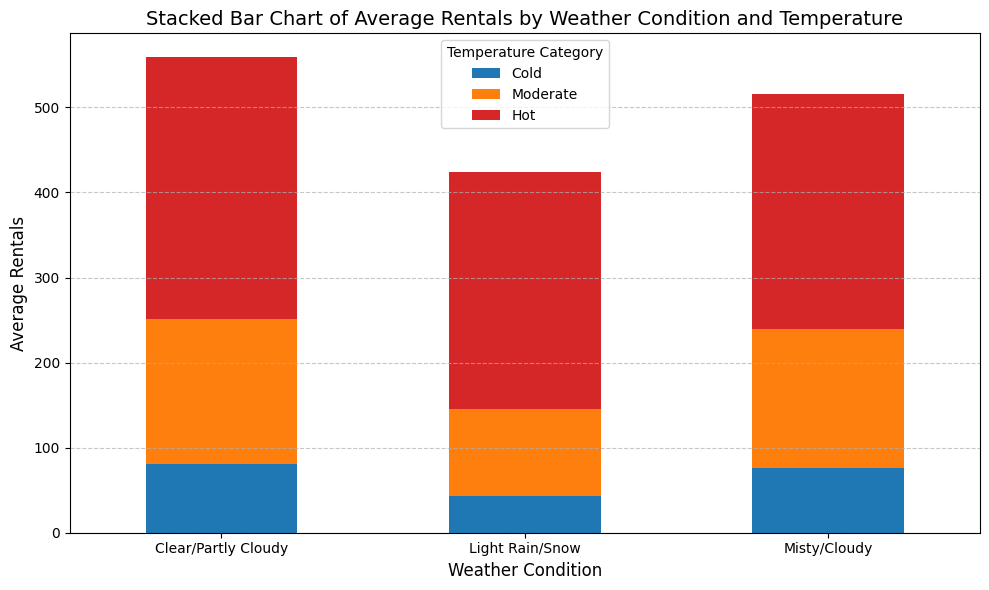

In [639]:
import matplotlib.pyplot as plt

# Group data by weather condition and temperature category
grouped_data = merged_df.groupby(['weather_condition_hourly', 'temperature_category']).agg({
    'total_rentals_hourly': ['mean', 'sum']
}).reset_index()

# Rename columns for easier access
grouped_data.columns = ['weather_condition', 'temperature_category', 'mean_rentals', 'total_rentals']

# Pivot data for stacked bar chart
pivot_data = grouped_data.pivot(index='weather_condition', columns='temperature_category', values='mean_rentals')

# Reorder columns to ensure the order is Cold, Moderate, Hot
pivot_data = pivot_data[['Cold', 'Moderate', 'Hot']]

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#d62728'])

# Add titles and labels
plt.title('Stacked Bar Chart of Average Rentals by Weather Condition and Temperature', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Temperature Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

**Insight:**
- Weather and Temperature heavily influence rental activity, with Clear/Partly Cloudy and Hot conditions leading to the most rentals.
- Time of Day plays a critical role, with commuting hours (morning and evening) being peak times for rentals.
- Weekday Patterns: Rentals increase toward the weekend, reflecting a shift from weekday commutes to weekend leisure activities.
- Low Rentals at Night: Rental activity is consistently low late at night across all conditions and weekdays.

## Analisis Lanjutan (Opsional)

#### A. Heatmap of Hourly Rentals by Weather Condition
This heatmap highlights the average rentals per hour segmented by weather conditions:

Rentals peak during morning and evening hours (commuting times) under Clear/Partly Cloudy conditions.
Misty/Cloudy and Light Rain/Snow show a similar pattern but with overall lower values.

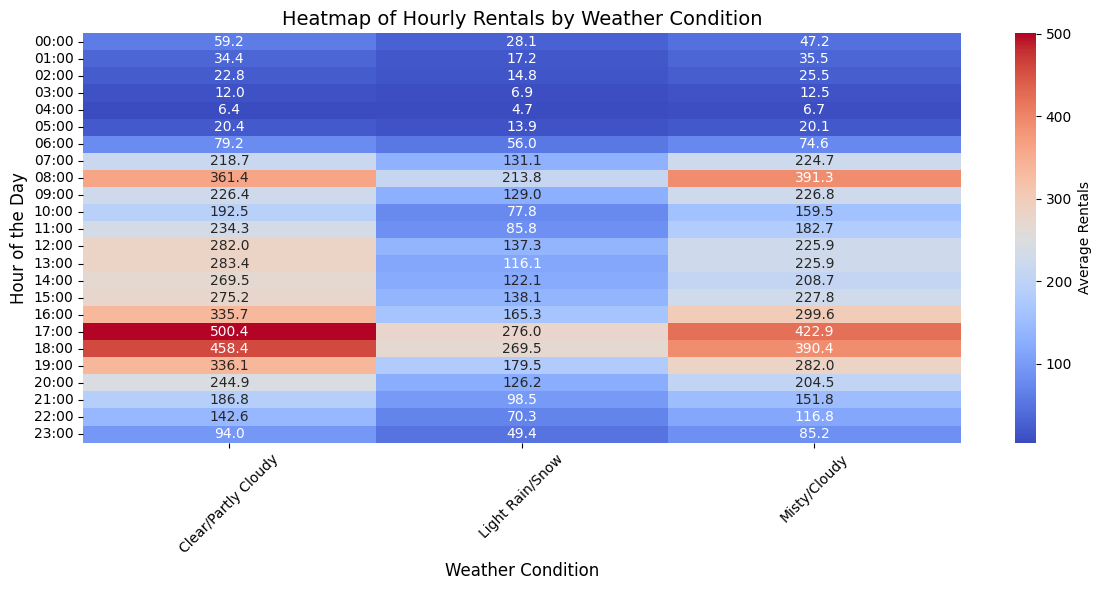

In [640]:
# Pivot data for weather condition and hourly rentals
hourly_weather_pivot = merged_df.pivot_table(
    values='total_rentals_hourly',
    index='time',  # Waktu per jam
    columns='weather_condition_hourly',  # Kondisi cuaca
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_weather_pivot, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Average Rentals'})
plt.title('Heatmap of Hourly Rentals by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Peak Rental Hours:**

*Across all weather conditions*, the highest rentals occur **between 17:00 (5 PM) and 18:00 (6 PM)**.
- Clear/Partly Cloudy at 17:00: 500.4 rentals (highest overall).
- Misty/Cloudy at 17:00: 422.9 rentals (second highest).
- Light Rain/Snow at 17:00: 276.0 rentals (lower, but still significant for this condition).

The morning peak occurs at 08:00 (8 AM):
Clear/Partly Cloudy: 361.4 rentals.
Misty/Cloudy: 224.7 rentals.
Light Rain/Snow: 131.1 rentals.

**Off-Peak Hours:**

*Rentals are consistently low* **between 00:00 (midnight) and 06:00 (6 AM)** across all weather conditions.
- Clear/Partly Cloudy at 03:00: 12.5 rentals.
- Misty/Cloudy at 03:00: 6.7 rentals.
- Light Rain/Snow at 03:00: 4.7 rentals (lowest overall).

**Impact of Weather Conditions:**

- Clear/Partly Cloudy: Shows the highest rentals throughout all hours, particularly during peak commuting hours (8 AM and 5-6 PM). Rentals are consistently higher than 200 between 7:00 and 20:00.
- Misty/Cloudy: Displays moderate rentals, with a peak at 17:00 (422.9 rentals) and relatively lower activity at other times compared to Clear/Partly Cloudy.
- Light Rain/Snow: Consistently records the lowest rentals, with minimal activity during off-peak hours and a small peak at 17:00 (276.0 rentals).
Hourly Trends:

_Rentals gradually increase starting at 6:00, peaking sharply at 8:00, stabilizing from 12:00 to 16:00, and then peaking again at 17:00.
After 18:00, rentals start declining rapidly across all weather conditions, returning to minimal activity by 22:00._


**Quantitative Insights**
- Clear/Partly Cloudy:
   - Peak: 500.4 rentals at 17:00.
   - Morning peak: 361.4 rentals at 8:00.
   - Off-peak: As low as 12.5 rentals at 3:00.

- Misty/Cloudy:
   - Peak: 422.9 rentals at 17:00.
   - Morning peak: 224.7 rentals at 8:00.
   - Off-peak: As low as 6.7 rentals at 3:00.

- Light Rain/Snow:
   - Peak: 276.0 rentals at 17:00.
   - Morning peak: 131.1 rentals at 8:00.
   - Off-peak: As low as 4.7 rentals at 3:00.

#### B. Visualization 2: Heatmap of Rentals by Peak/Off-Peak and Weather Condition
This heatmap visualizes the average rentals during peak and off-peak times across different weather conditions. It shows:

Clear/Partly Cloudy weather has the highest rentals during peak hours.
Off-peak rentals are significantly lower across all weather conditions, with the lowest values in Light Rain/Snow weather.

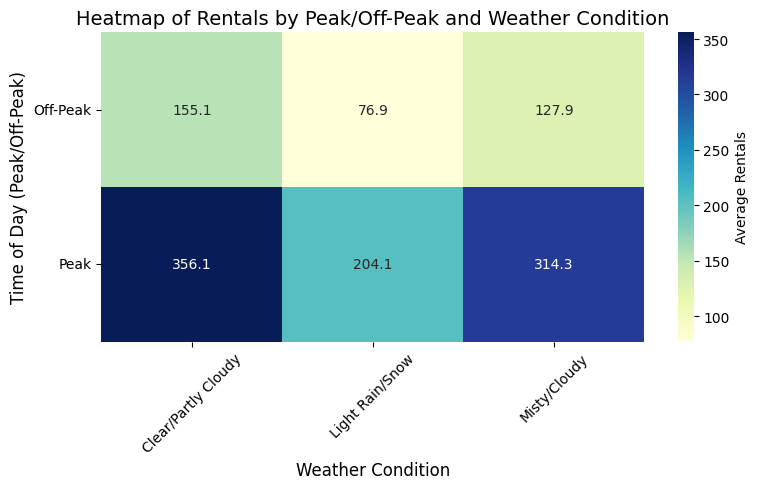

In [641]:
# Define peak and off-peak hours
def categorize_peak(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

# Apply peak/off-peak category to the dataset
merged_df['peak_category'] = merged_df['time'].str[:2].astype(int).apply(categorize_peak)

# Pivot data for peak category and weather condition
peak_weather_pivot = merged_df.pivot_table(
    values='total_rentals_hourly',
    index='peak_category',  # Peak vs Off-Peak
    columns='weather_condition_hourly',  # Weather condition
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(peak_weather_pivot, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Average Rentals'})
plt.title('Heatmap of Rentals by Peak/Off-Peak and Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Time of Day (Peak/Off-Peak)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Detailed Analysis of Heatmap: Rentals by Peak/Off-Peak and Weather Condition

#### **Key Observations**
1. **Peak vs. Off-Peak:**
   - Peak time rentals are significantly higher compared to off-peak rentals for all weather conditions.
     - Clear/Partly Cloudy: 356.1 rentals during peak vs. 155.1 during off-peak.
     - Light Rain/Snow: 204.1 rentals during peak vs. 76.9 during off-peak.
     - Misty/Cloudy: 314.3 rentals during peak vs. 127.9 during off-peak.

2. **Weather Condition Impact:**
   - Clear/Partly Cloudy consistently shows the highest average rentals, regardless of the time of day.
     - Rentals during peak: 356.1 (highest across all conditions).
     - Rentals during off-peak: 155.1 (still higher than others in off-peak).
   - Misty/Cloudy follows, with:
     - Rentals during peak: 314.3 (second highest).
     - Rentals during off-peak: 127.9.
   - Light Rain/Snow results in the lowest rentals, showing:
     - Rentals during peak: 204.1.
     - Rentals during off-peak: 76.9.

3. **Quantitative Insights:**
   - Clear/Partly Cloudy: Peak time rentals are 2.3 times higher than off-peak.
   - Misty/Cloudy: Peak rentals are approximately 2.5 times higher than off-peak.
   - Light Rain/Snow: Rentals during peak are also 2.6 times higher compared to off-peak, reflecting a similar trend.

### Business Plan and Strategies

1. Target commuters during peak hours:
   - Focus on weekday commuters by enhancing service availability during peak hours (8:00 AM and 5:00 PM). Deploy additional bikes at key commuter hubs, such as near offices, public transportation stations, and residential areas.
   - Promote monthly subscription plans with discounts or added benefits to encourage loyalty and consistent usage among regular commuters.

2. Increase weekend rentals:
   - Boost leisure rentals by partnering with parks, tourist attractions, and recreational areas to attract more users. Offer flexible pricing or group discounts for families and friends.
   - Design marketing campaigns around weekend events or activities like city bike tours or cycling challenges to increase weekend ridership.

3. Adapt to weather conditions:
   - Use weather forecasts to manage inventory dynamically. Reduce the number of operational bikes during rainy or snowy conditions in less active stations while focusing on sheltered or indoor areas.
   - Offer weather-based discounts during cloudy or misty weather to encourage users to rent bikes despite less favorable conditions.

4. Optimize based on temperature patterns:
   - Identify months or seasons with moderate temperatures (10°C to 25°C) and invest in targeted advertising campaigns to promote cycling during these periods.
   - Provide optional seasonal accessories, such as gloves or rain gear in colder months and water bottle holders in hotter months, to enhance rider comfort.

5. Improve service convenience:
   - Use heatmaps of rental activity to strategically place bike stations near high-demand areas during peak and off-peak times.
   - Enhance the mobile app by integrating real-time weather updates, temperature forecasts, and personalized recommendations for ideal riding times.

6. Leverage data for strategic decisions:
   - Regularly analyze hourly and daily rental trends alongside weather and temperature data to optimize bike placement, pricing, and promotional strategies.
   - Use forecasting tools to anticipate seasonal shifts in demand and plan expansion into new areas with similar usage patterns.

7. Create loyalty programs:
   - Develop programs to reward frequent riders with incentives, such as free rides or discounts for off-peak usage or riding in challenging weather conditions.
   - Introduce referral programs to encourage existing users to bring in new customers, especially during low-demand periods or in underutilized locations.

8. Educate and promote health benefits:
   - Engage the community through workshops or campaigns about the health and environmental benefits of cycling, particularly in areas with moderate weather conditions.
   - Use social media platforms to share inspiring stories, user testimonials, and challenges that highlight cycling as a sustainable and health-conscious activity.


## Conclusion

### Conclusion

- Bike rentals exhibit distinct patterns across both daily and hourly timelines. Hourly data reveals two prominent peaks in demand, occurring at 8:00 AM and 5:00 PM, which correspond to the start and end of typical working hours. These peaks highlight the strong influence of commuter behavior on rental activity. In contrast, rental numbers significantly decrease during late-night and early-morning hours, with minimal activity between 12:00 AM and 5:00 AM. On a daily basis, rentals tend to be higher during weekends, with Saturday experiencing the highest overall rentals. This pattern indicates that leisure activities drive demand on non-working days, whereas weekdays show steady usage aligned with work-related commuting.
  
- External factors such as weather conditions and temperature substantially affect bike rental demand. Clear or partly cloudy weather results in the highest number of rentals, followed by misty or cloudy conditions. However, light rain or snow significantly reduces bike usage, suggesting that adverse weather discourages outdoor activities. Temperature further influences rental patterns, with the highest rentals occurring during moderate temperatures ranging from 10°C to 25°C. Extreme cold or heat leads to lower rentals, reflecting user preference for comfortable riding conditions. These insights demonstrate that favorable weather and moderate temperatures are key drivers of bike-sharing demand, while unfavorable conditions tend to suppress usage.
